<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Day-1-Descriptive-Statistics. Exercise 1: Train-Test Split Walk Through </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2025</center>

## In-class Tutorial + Exercise (10 mins)

Exercise Goal: learn how to perform a train-test split

You have been contacted by company B, that would like to increase their sales. They have recently done a marketing campaign where they sent a promotional email to their customer with either:

- a buy one get one offer
- a discount offer
- no offer.

They would like you to build a predictive model for “conversion”: given data on the customer, can you predict whether they will buy something on the website after receiving the promotional email?

They sent you the Marketing.csv file, with the following columns:

- recency: months since the last purchase made by customer
- history: total amount ever spent by the customer in the shop
- used_discount: whether the customer has already used a discount before
- used_bogo: whether the customer has already used a “buy one, get one” offer before
- zip_code: class of the zip code (the customer can be either Suburban, Urban or Rural)
- is_referral: whether the customer was acquired through a referal channel
- channel: channels that the customer is using (Phone, Web, Multichannel)
- offer: the offer sent ()
- conversion: 1=customer bought something, 0= customer did not buy anything.

We are not going to go through the whole modelling and prediction here. You will learn about it in the following weeks. Here, we just want you to compare 2 train-test split strategies. What you need to do:

- Read customer data (file ‘Marketing.csv’)
- Make a histogram of **conversion** feature
- Generate a train-test split using following code (see Python code) and make a histogram of the **conversion** variable for both scenarios and answer the question **Which one of the two represents a proper random sample and why?**
- **Bonus**: make histograms of the other columns for the different train/test splits. What do you observe?


```python
train = df.sample(frac=0.75, random_state=100)
test = df.drop(train.index).sample(frac=1.0)

train = df.head(int(0.75*len(df)))
test = df.drop(train.index)
```


In [1]:
import pandas as pd
# Marketing3.csv
# data_file='https://drive.google.com/uc?export=download&id=1-6CGpOFdmZ8vOz3OrCXZC170q1zJDJtQ'
df = pd.read_csv('/Users/szewing/Desktop/Course/CDBootcamp/debbie_to/02_Statistics/day1/Marketing3.csv')
df

,Unnamed: 0,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,1,5,349.41,1,1,Surburban,1,Phone,Buy One Get One,0
2,2,7,64.04,0,1,Rural,0,Web,Buy One Get One,1
3,3,2,244.82,0,1,Rural,1,Web,Buy One Get One,1
4,4,11,302.15,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...,...
63995,63995,9,135.36,1,0,Urban,1,Phone,No Offer,0
63996,63996,3,74.42,0,1,Rural,1,Web,No Offer,0
63997,63997,10,279.57,1,0,Rural,1,Web,No Offer,1
63998,63998,10,44.46,1,0,Rural,0,Web,No Offer,0


54606 9394


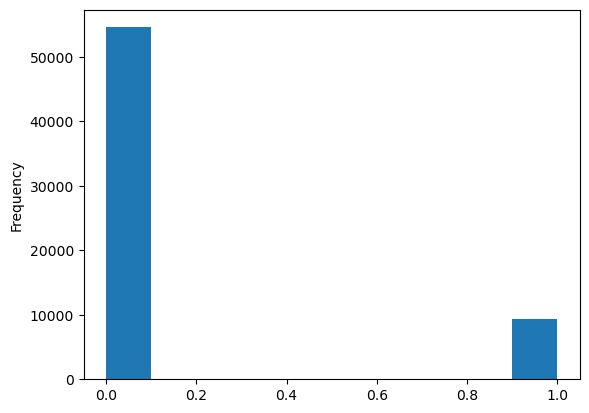

In [2]:
# your code here

# histogram for "conversion"
df['conversion'].plot(kind='hist')
print(len(df[df['conversion'] == 0]), len(df[df['conversion'] == 1]))

### 1. random samples

In [3]:
# generate train-test split set
train = df.sample(frac=0.75, random_state=100)      # randomly selecting 0.75 portion of rows from df
test = df.drop(train.index).sample(frac=1.0)        # drop training rows -> left 0.25 portion + shuffling the test set to avoid bias (i.e. representativeness) and help insepction

len(train), len(test)

(48000, 16000)

,train,test
0,40962,13644
1,7038,2356


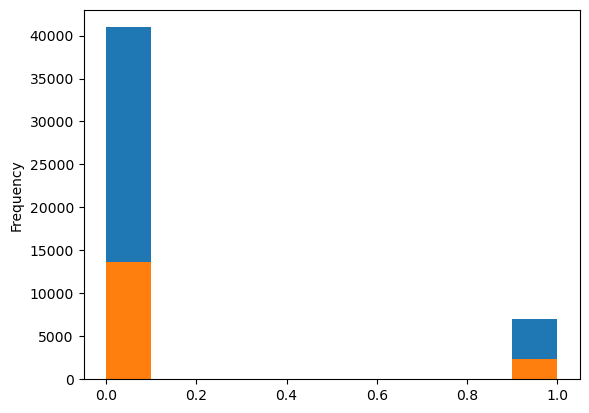

In [4]:
train['conversion'].plot(kind='hist')
test['conversion'].plot(kind='hist')

df1 = pd.DataFrame({'train':[len(train[train['conversion'] == i]) for i in range(2)],
                    'test':[len(test[test['conversion'] == i]) for i in range(2)]})
df1

In [5]:
# try sklearn
from sklearn.model_selection import train_test_split

train_skl, test_skl = train_test_split(df, test_size=0.25, random_state=100)

,train,test
0,40976,13630
1,7024,2370


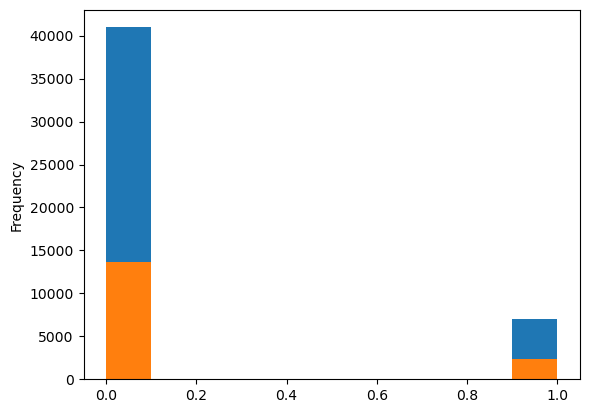

In [6]:
train_skl['conversion'].plot(kind='hist')
test_skl['conversion'].plot(kind='hist')

skl = pd.DataFrame({'train':[len(train_skl[train_skl['conversion'] == i]) for i in range(2)], 
                    'test':[len(test_skl[test_skl['conversion'] == i]) for i in range(2)]})
skl


### 2. non-random sample

In [7]:
train2 = df.head(int(0.75*len(df)))
test2 = df.drop(train.index)

,train,test
0,40307,13644
1,7693,2356


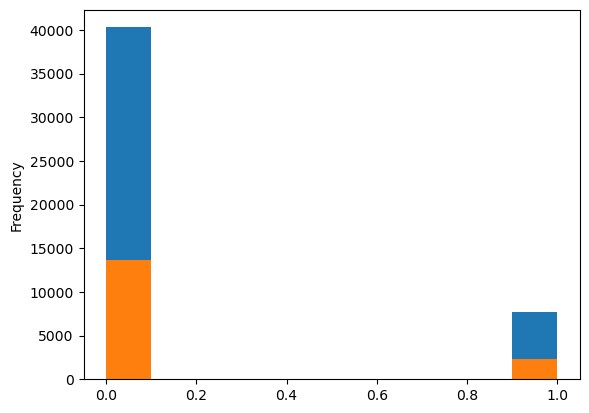

In [8]:
train2['conversion'].plot(kind='hist')
test2['conversion'].plot(kind='hist')

df2 = pd.DataFrame({'train':[len(train2[train2['conversion'] == i]) for i in range(2)], 
                    'test':[len(test2[test2['conversion'] == i]) for i in range(2)]})
df2

In [9]:
pd.concat([df, skl, df2])

,Unnamed: 0,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,train,test
0,0.0,10.0,142.44,1.0,0.0,Surburban,0.0,Phone,Buy One Get One,0.0,NaN,NaN
1,1.0,5.0,349.41,1.0,1.0,Surburban,1.0,Phone,Buy One Get One,0.0,NaN,NaN
2,2.0,7.0,64.04,0.0,1.0,Rural,0.0,Web,Buy One Get One,1.0,NaN,NaN
3,3.0,2.0,244.82,0.0,1.0,Rural,1.0,Web,Buy One Get One,1.0,NaN,NaN
4,4.0,11.0,302.15,1.0,0.0,Urban,0.0,Web,Buy One Get One,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
63999,63999.0,7.0,39.01,0.0,1.0,Surburban,0.0,Web,No Offer,0.0,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40976.0,13630.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7024.0,2370.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40307.0,13644.0


### Bonus: other variables

#### history - total amount ever spent by the customer in the shop

In [10]:
train = df.sample(frac=0.75, random_state=100)
test = df.drop(train.index).sample(frac=1.0)

In [11]:
train

,Unnamed: 0,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
8266,8266,6,416.77,1,0,Urban,0,Web,Buy One Get One,1
6425,6425,9,215.77,0,1,Urban,0,Phone,Buy One Get One,0
12330,12330,6,270.97,1,0,Surburban,1,Multichannel,Buy One Get One,0
37145,37145,10,96.21,1,0,Rural,1,Phone,Discount,0
9257,9257,10,85.77,0,1,Urban,1,Phone,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...,...
26226,26226,1,356.56,1,1,Urban,0,Web,Discount,0
24853,24853,9,29.99,1,0,Rural,0,Web,Discount,0
4411,4411,10,303.27,1,0,Urban,0,Multichannel,Buy One Get One,0
51742,51742,5,343.96,0,1,Urban,0,Phone,No Offer,1


<Axes: ylabel='Frequency'>

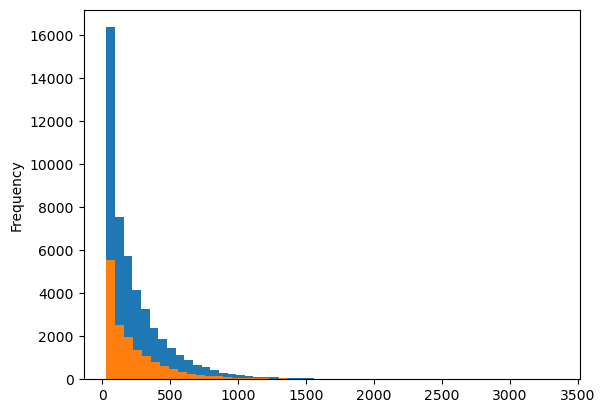

In [14]:
train['history'].plot(kind='hist', bins=50)
test['history'].plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

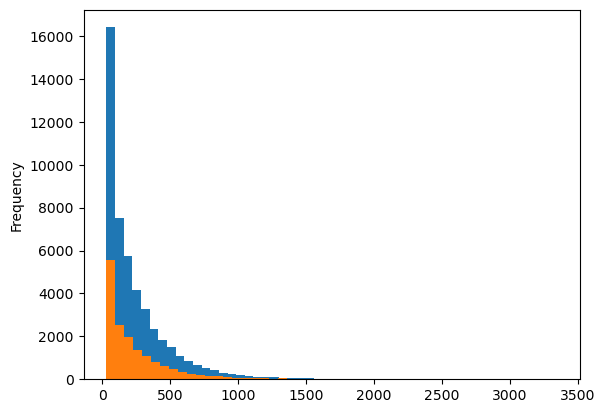

In [ ]:
train2 = df.head(int(0.75*len(df)))
test2 = df.drop(train.index)

train2['history'].plot(kind='hist', bins=50)     # bins= , stacked bars..
test2['history'].plot(kind='hist', bins=50)


In [ ]:
# mean values from different sampling methods
train['history'].mean().round(2), test['history'].mean().round(2), train2['history'].mean().round(2), test2['history'].mean().round(2)

(np.float64(241.15),
 np.float64(244.89),
 np.float64(242.43),
 np.float64(244.89))